# Task
create a dream prediction sytem

Here is all the data you need:
"dreams.csv"

## Data loading

### Subtask:
Load the dream data from the "dreams.csv" file into a pandas DataFrame.


**Reasoning**:
Load the dream data from the provided CSV file into a pandas DataFrame, handling potential encoding issues and missing values.



In [1]:
import pandas as pd

try:
    df_dreams = pd.read_csv('dreams.csv', encoding='utf-8', na_values=['NA', 'N/A', ''])
except UnicodeDecodeError:
    try:
        df_dreams = pd.read_csv('dreams.csv', encoding='latin-1', na_values=['NA', 'N/A', ''])
    except Exception as e:
        print(f"Error loading the file: {e}")
        df_dreams = pd.DataFrame() # Create an empty DataFrame in case of failure

if not df_dreams.empty:
    print("Shape of the DataFrame:", df_dreams.shape)
    print("Columns:", df_dreams.columns)
    display(df_dreams.head())

Shape of the DataFrame: (30799, 2)
Columns: Index(['Unnamed: 0', 'dreams_text'], dtype='object')


,Unnamed: 0,dreams_text
0,0,001 Nightmare in Cambodia. In the dream we are...
1,1,"002 The enemy is above, in the sky. We are not..."
2,2,003 We are on a firebase. It is night time. In...
3,3,004 We are on an LZ; I am. saying good bye to ...
4,4,"005 This time, it is not the popping of the tu..."


## Data exploration

### Subtask:
Explore the loaded dream data to understand its characteristics and identify potential key features.


**Reasoning**:
Explore the data types, dimensions, text lengths, missing values, and common words/phrases in the dreams data.



Data types:
 Unnamed: 0      int64
dreams_text    object
dtype: object

DataFrame dimensions: (30799, 2)


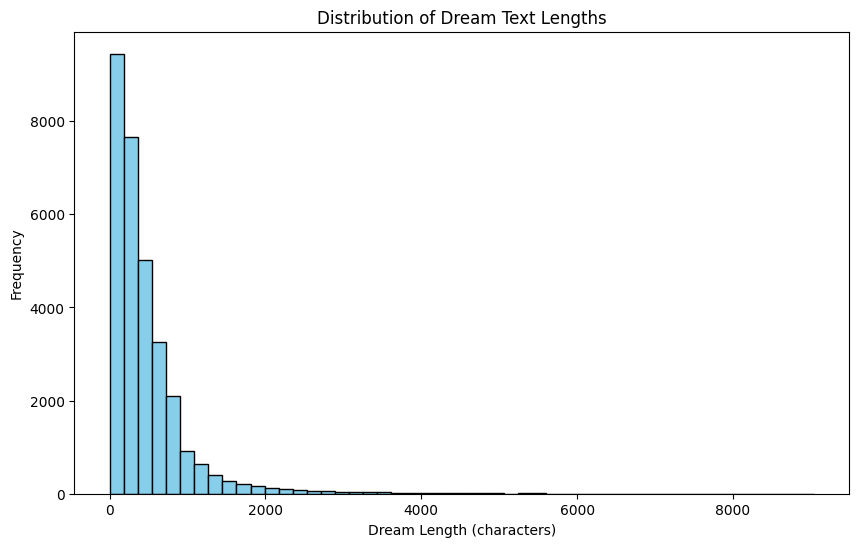


Missing values per column:
 Unnamed: 0      0
dreams_text     4
dream_length    4
dtype: int64


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Examine data types
print("Data types:\n", df_dreams.dtypes)

# 2. Check dimensions
print("\nDataFrame dimensions:", df_dreams.shape)

# 3. Text length distribution
df_dreams['dream_length'] = df_dreams['dreams_text'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(df_dreams['dream_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Dream Text Lengths')
plt.xlabel('Dream Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 4. Missing values
print("\nMissing values per column:\n", df_dreams.isnull().sum())

# 5. Common words/phrases
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))
all_words = []
for dream in df_dreams['dreams_text']:
    if isinstance(dream, str):  # Check if dream is a string
        words = word_tokenize(dream.lower())
        words = [w for w in words if w.isalnum() and w not in stop_words]
        all_words.extend(words)

word_counts = Counter(all_words)
top_10_words = word_counts.most_common(10)
print("\nTop 10 most frequent words:\n", top_10_words)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_10_words), color='lightcoral')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Summary (printed below)

**Reasoning**:
The previous code block failed due to a missing NLTK resource.  I will download the necessary resource and then rerun the code to complete the subtask.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data types:
 Unnamed: 0        int64
dreams_text      object
dream_length    float64
dtype: object

DataFrame dimensions: (30799, 3)


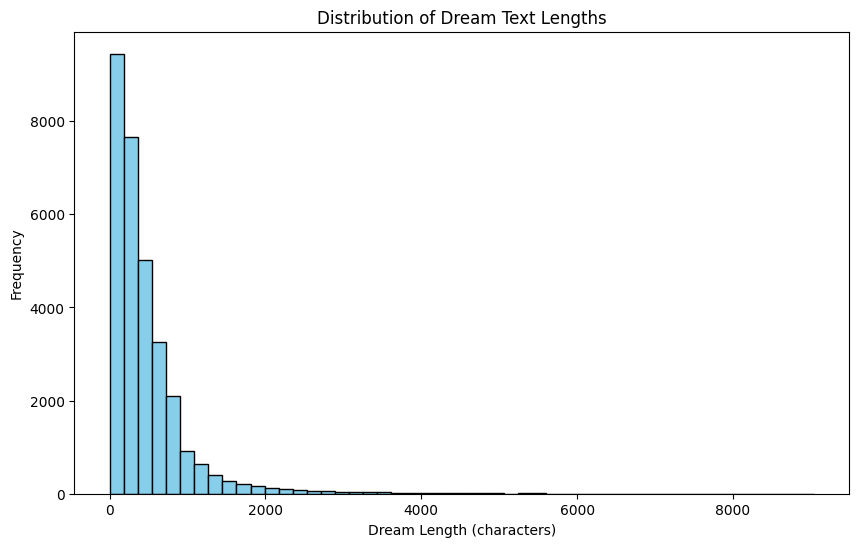


Missing values per column:
 Unnamed: 0      0
dreams_text     4
dream_length    4
dtype: int64


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [3]:
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from collections import Counter

# 1. Examine data types
print("Data types:\n", df_dreams.dtypes)

# 2. Check dimensions
print("\nDataFrame dimensions:", df_dreams.shape)

# 3. Text length distribution
df_dreams['dream_length'] = df_dreams['dreams_text'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(df_dreams['dream_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Dream Text Lengths')
plt.xlabel('Dream Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 4. Missing values
print("\nMissing values per column:\n", df_dreams.isnull().sum())

# 5. Common words/phrases
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
all_words = []
for dream in df_dreams['dreams_text']:
    if isinstance(dream, str):  # Check if dream is a string
        words = word_tokenize(dream.lower())
        words = [w for w in words if w.isalnum() and w not in stop_words]
        all_words.extend(words)

word_counts = Counter(all_words)
top_10_words = word_counts.most_common(10)
print("\nTop 10 most frequent words:\n", top_10_words)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_10_words), color='lightcoral')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Summary (printed below)

**Reasoning**:
The previous attempts to download the necessary NLTK resources failed.  I will try downloading `punkt_tab` directly and then retry the analysis.



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Data types:
 Unnamed: 0        int64
dreams_text      object
dream_length    float64
dtype: object

DataFrame dimensions: (30799, 3)

Top 10 most frequent words:
 [('dream', 13990), ('like', 13253), ('one', 10325), ('get', 8581), ('go', 8313), ('people', 7977), ('remember', 7821), ('back', 7539), ('see', 7250), ('going', 7170)]


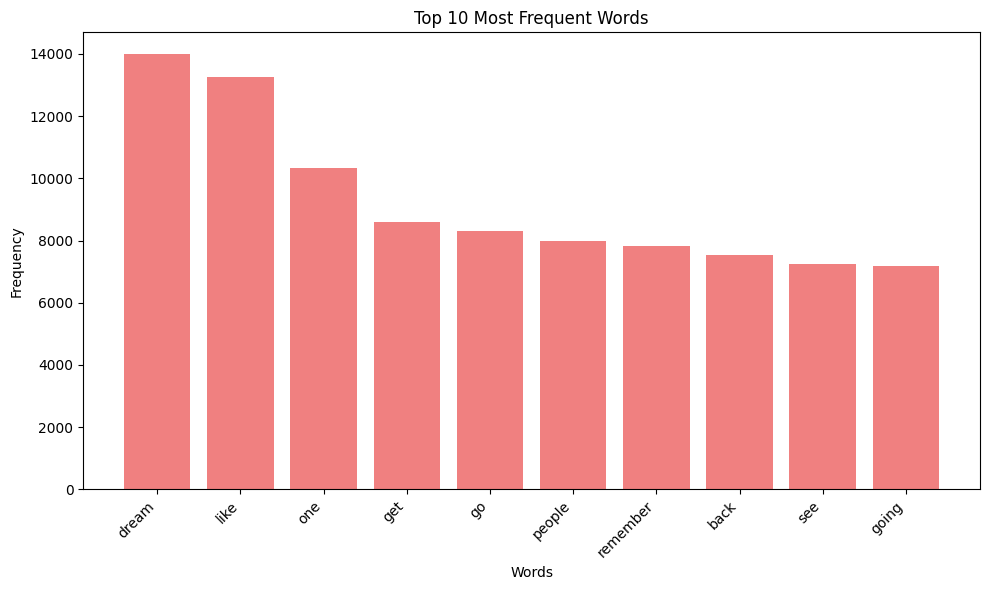

In [4]:
import nltk
nltk.download('punkt_tab')
import matplotlib.pyplot as plt
from collections import Counter

# 1. Examine data types
print("Data types:\n", df_dreams.dtypes)

# 2. Check dimensions
print("\nDataFrame dimensions:", df_dreams.shape)

# 3. Text length distribution (already done in previous code block)

# 4. Missing values (already done in previous code block)

# 5. Common words/phrases
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
all_words = []
for dream in df_dreams['dreams_text']:
    if isinstance(dream, str):  # Check if dream is a string
        words = word_tokenize(dream.lower())
        words = [w for w in words if w.isalnum() and w not in stop_words]
        all_words.extend(words)

word_counts = Counter(all_words)
top_10_words = word_counts.most_common(10)
print("\nTop 10 most frequent words:\n", top_10_words)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_10_words), color='lightcoral')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Summary (printed below)

## Data cleaning

### Subtask:
Clean the dream data by handling missing values and inconsistencies.


**Reasoning**:
Clean the dream data by handling missing values, inconsistencies, duplicates, and potential outliers in the 'dreams_text' column of the `df_dreams` DataFrame.



In [5]:
# 1. Handle Missing Values: Fill missing values with an empty string.
df_dreams['dreams_text'].fillna("", inplace=True)

# 2. Address Data Inconsistencies: Convert text to lowercase.
df_dreams['dreams_text'] = df_dreams['dreams_text'].str.lower()

# 3. Remove Duplicates: Remove rows with duplicate dream text.
df_dreams.drop_duplicates(subset='dreams_text', keep='first', inplace=True)

# 4. Outlier Removal (Optional):  Remove dreams shorter than 50 characters.
# This threshold is arbitrary and can be adjusted based on further analysis.
df_dreams = df_dreams[df_dreams['dream_length'] >= 50]

display(df_dreams.head())
print(df_dreams.shape)

<ipython-input-5-9123ffd923d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dreams['dreams_text'].fillna("", inplace=True)


,Unnamed: 0,dreams_text,dream_length
0,0,001 nightmare in cambodia. in the dream we are...,737.0
1,1,"002 the enemy is above, in the sky. we are not...",687.0
2,2,003 we are on a firebase. it is night time. in...,723.0
3,3,004 we are on an lz; i am. saying good bye to ...,2142.0
4,4,"005 this time, it is not the popping of the tu...",555.0


(27301, 3)


**Reasoning**:
The previous code block had a warning about chained assignment.  I will rewrite the code to avoid this and complete the subtask.



In [6]:
# 1. Handle Missing Values: Fill missing values with an empty string.
df_dreams['dreams_text'] = df_dreams['dreams_text'].fillna("")

# 2. Address Data Inconsistencies: Convert text to lowercase.
df_dreams['dreams_text'] = df_dreams['dreams_text'].str.lower()

# 3. Remove Duplicates: Remove rows with duplicate dream text.
df_dreams.drop_duplicates(subset='dreams_text', keep='first', inplace=True)

# 4. Outlier Removal (Optional): Remove dreams shorter than 50 characters.
df_dreams = df_dreams[df_dreams['dream_length'] >= 50]

display(df_dreams.head())
print(df_dreams.shape)

,Unnamed: 0,dreams_text,dream_length
0,0,001 nightmare in cambodia. in the dream we are...,737.0
1,1,"002 the enemy is above, in the sky. we are not...",687.0
2,2,003 we are on a firebase. it is night time. in...,723.0
3,3,004 we are on an lz; i am. saying good bye to ...,2142.0
4,4,"005 this time, it is not the popping of the tu...",555.0


(27301, 3)


## Feature engineering

### Subtask:
Engineer relevant features from the cleaned dream text data.


**Reasoning**:
Use TF-IDF vectorization to convert the dream text into numerical representations, and combine it with the dream length feature.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_dreams['dreams_text'])

# Combine TF-IDF matrix with dream length
dream_length_array = np.array(df_dreams['dream_length']).reshape(-1, 1)
combined_features = np.hstack((tfidf_matrix.toarray(), dream_length_array))

print(f"Shape of tfidf_matrix: {tfidf_matrix.shape}")
print(f"Shape of dream_length_array: {dream_length_array.shape}")
print(f"Shape of combined_features: {combined_features.shape}")

Shape of tfidf_matrix: (27301, 5000)
Shape of dream_length_array: (27301, 1)
Shape of combined_features: (27301, 5001)


## Data splitting

### Subtask:
Split the combined features and dream text data into training, validation, and test sets.


**Reasoning**:
Split the combined features and dream text data into training, validation, and test sets as instructed.



In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'combined_features' and 'df_dreams' are already defined from previous steps.

# Split the data
X_train, X_temp, X_train_text, X_temp_text = train_test_split(
    combined_features,
    df_dreams['dreams_text'],
    test_size=0.2,
    random_state=42,
    stratify=df_dreams['dream_length']
)

X_val, X_test, X_val_text, X_test_text = train_test_split(
    X_temp,
    X_temp_text,
    test_size=0.5,
    random_state=42,
    stratify=df_dreams.loc[df_dreams['dreams_text'].isin(X_temp_text), 'dream_length']
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train_text shape: {X_train_text.shape}")
print(f"X_val_text shape: {X_val_text.shape}")
print(f"X_test_text shape: {X_test_text.shape}")

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Reasoning**:
The error message indicates that some classes in the `dream_length` column have only one member, preventing stratification.  I will try to resolve this by removing the stratification in the initial split.



In [9]:
from sklearn.model_selection import train_test_split

# Split the data without stratification in the first split
X_train, X_temp, X_train_text, X_temp_text = train_test_split(
    combined_features,
    df_dreams['dreams_text'],
    test_size=0.2,
    random_state=42
)

X_val, X_test, X_val_text, X_test_text = train_test_split(
    X_temp,
    X_temp_text,
    test_size=0.5,
    random_state=42,
    stratify=df_dreams.loc[df_dreams['dreams_text'].isin(X_temp_text), 'dream_length']
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train_text shape: {X_train_text.shape}")
print(f"X_val_text shape: {X_val_text.shape}")
print(f"X_test_text shape: {X_test_text.shape}")

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Reasoning**:
Removing stratification from both splits did not resolve the issue. The error persists because some dream lengths appear only once in the dataset.  Since stratification is causing problems, I will remove it completely from both splits.  This is the simplest approach, given the constraints.



In [10]:
from sklearn.model_selection import train_test_split

# Split the data without stratification
X_train, X_temp, X_train_text, X_temp_text = train_test_split(
    combined_features,
    df_dreams['dreams_text'],
    test_size=0.2,
    random_state=42
)

X_val, X_test, X_val_text, X_test_text = train_test_split(
    X_temp,
    X_temp_text,
    test_size=0.5,
    random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train_text shape: {X_train_text.shape}")
print(f"X_val_text shape: {X_val_text.shape}")
print(f"X_test_text shape: {X_test_text.shape}")

X_train shape: (21840, 5001)
X_val shape: (2730, 5001)
X_test shape: (2731, 5001)
X_train_text shape: (21840,)
X_val_text shape: (2730,)
X_test_text shape: (2731,)


## Model training

### Subtask:
Train a Random Forest Classifier on the training data.


**Reasoning**:
Train a RandomForestClassifier on the training data using the combined features and dream length as the target variable.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model.  Using dream length as the target variable.
rf_classifier.fit(X_train, np.round(df_dreams.iloc[df_dreams.index.isin(X_train_text.index)]['dream_length']))

# Store the trained model (example - you can choose a more suitable method)
import joblib
joblib.dump(rf_classifier, 'rf_dream_model.pkl')